In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [3]:
data = pd.read_csv("winemag-data-130k-v2.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df = data[[ 'country', 'description', 'designation', 'points', 'price', 'province', 'title', 'variety', 'winery']]
df.to_csv('wine.csv',index=False)

In [5]:
dataNew = pd.read_csv("wine.csv")
dataNew.head()

,country,description,designation,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
def isPrice(x):
    if x>=10 and x<=20:
        return  True             
    return False

Price = dataNew.groupby(dataNew.apply(lambda x: isPrice(x['price']) ,axis=1))
Price.groups

{False: Int64Index([     0,      4,      7,      9,     11,     12,     13,     15,
                 16,     18,
             ...
             129960, 129961, 129962, 129964, 129965, 129966, 129967, 129968,
             129969, 129970],
            dtype='int64', length=86471),
 True: Int64Index([     1,      2,      3,      5,      6,      8,     10,     14,
                 17,     21,
             ...
             129909, 129921, 129941, 129945, 129946, 129947, 129954, 129956,
             129957, 129963],
            dtype='int64', length=43500)}

In [7]:
NewPrice = Price.get_group(True)
NewPrice = NewPrice.dropna(axis=0)
NewPrice

,country,description,designation,points,price,province,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
...,...,...,...,...,...,...,...,...,...
129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera
129954,New Zealand,One of the more characterful Pinot Gris for th...,Single Estate,90,15.0,Marlborough,Ara 2013 Single Estate Pinot Gris (Marlborough),Pinot Gris,Ara
129956,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,19.0,Hawke's Bay,Esk Valley 2011 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley
129957,Spain,Lightly baked berry aromas vie for attention w...,Crianza,90,17.0,Northern Spain,Viñedos Real Rubio 2010 Crianza (Rioja),Tempranillo Blend,Viñedos Real Rubio


In [8]:
NewPrice.groupby('country').groups

{'Argentina': Int64Index([    17,    245,    253,    266,    273,    728,    735,    738,
                914,    919,
             ...
             129347, 129353, 129605, 129612, 129619, 129620, 129623, 129705,
             129709, 129921],
            dtype='int64', length=1727),
 'Armenia': Int64Index([8170, 66146], dtype='int64'),
 'Australia': Int64Index([    77,     83,    232,    246,    893,    997,   1154,   1182,
               1199,   1478,
             ...
             127609, 127611, 128181, 128744, 129210, 129230, 129406, 129414,
             129433, 129446],
            dtype='int64', length=656),
 'Austria': Int64Index([   428,    441,    444,    491,    502,    586,    587,    591,
               1043,   1056,
             ...
             127419, 128566, 128961, 129008, 129252, 129405, 129514, 129550,
             129556, 129837],
            dtype='int64', length=746),
 'Bosnia and Herzegovina': Int64Index([16467], dtype='int64'),
 'Brazil': Int64Index([ 12669,  132

In [27]:
def isCountry(x):
    if x == 'Italy' or x=='Spain' or x == 'France' or x=='Chile':
        return  True             
    return False

NewPrice1 = NewPrice.groupby(dataNew.apply(lambda x: isCountry(x['country']) ,axis=1))
NewPrice1.groups

{False: Int64Index([     1,      3,      8,     10,     17,     77,     83,     85,
                 97,    101,
             ...
             129865, 129879, 129907, 129909, 129921, 129945, 129946, 129954,
             129956, 129963],
            dtype='int64', length=14400),
 True: Int64Index([     5,      6,     22,     26,     28,     36,     38,     39,
                 46,     49,
             ...
             129830, 129834, 129843, 129849, 129853, 129856, 129876, 129877,
             129947, 129957],
            dtype='int64', length=12985)}

In [28]:
NewPrice2 = NewPrice1.get_group(True)
NewPrice2 = NewPrice2.dropna(axis=0)
NewPrice2

,country,description,designation,points,price,province,title,variety,winery
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari
28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...
129856,Spain,Lime and grapefruit aromas are a touch pithy a...,Ethereo,90,15.0,Galicia,Bodegas Eidosela 2015 Ethereo Albariño (Rías B...,Albariño,Bodegas Eidosela
129876,France,"This is a delicious, ripe and fruity wine that...",L'Ancien,90,19.0,Beaujolais,Domaine des Terres Dorées 2015 L'Ancien (Beau...,Gamay,Domaine des Terres Dorées
129877,France,An open and inviting scent of ripe pear is fre...,Cuvée Engel,90,19.0,Alsace,Domaine Fernand Engel 2014 Cuvée Engel Pinot G...,Pinot Gris,Domaine Fernand Engel
129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera


In [29]:
len(NewPrice2)

12985

In [30]:
NewPrice2['pointsbyprice']= NewPrice2.apply(lambda x: x['points']/(10+np.log( x['price'])), axis=1)

In [31]:
NewPrice2

,country,description,designation,points,price,province,title,variety,winery,pointsbyprice
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,6.846054
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,6.811462
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,6.721033
26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,6.924023
28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo,6.779284
...,...,...,...,...,...,...,...,...,...,...
129856,Spain,Lime and grapefruit aromas are a touch pithy a...,Ethereo,90,15.0,Galicia,Bodegas Eidosela 2015 Ethereo Albariño (Rías B...,Albariño,Bodegas Eidosela,7.082125
129876,France,"This is a delicious, ripe and fruity wine that...",L'Ancien,90,19.0,Beaujolais,Domaine des Terres Dorées 2015 L'Ancien (Beau...,Gamay,Domaine des Terres Dorées,6.952793
129877,France,An open and inviting scent of ripe pear is fre...,Cuvée Engel,90,19.0,Alsace,Domaine Fernand Engel 2014 Cuvée Engel Pinot G...,Pinot Gris,Domaine Fernand Engel,6.952793
129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera,6.925350


In [33]:
stats.levene(NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Italy'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Spain'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'France'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Chile'])

LeveneResult(statistic=68.24281547667296, pvalue=8.850543904773023e-44)

In [34]:
stats.shapiro(NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Italy'])

(0.9957708120346069, 1.2300862550773672e-08)

In [35]:
stats.shapiro(NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Spain'])

(0.9891182780265808, 4.1746619182381206e-13)

In [36]:
stats.shapiro(NewPrice2['pointsbyprice'][NewPrice2['country'] == 'France'])

(0.9979862570762634, 2.8442365874070674e-05)

In [37]:
stats.shapiro(NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Chile'])

(0.982191264629364, 1.655886546155603e-17)

В нашем случае получилось, что нормальности нет, как и равенства дисперсий, поэтому применяем критерий Краскела-Уоллиса

In [47]:
stats.kruskal(NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Italy'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Spain'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'France'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Chile'])

KruskalResult(statistic=119.32227274873593, pvalue=1.0799247591554107e-25)

Отвергаем гипотезу, что средние равны

In [46]:
stats.kruskal(NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Italy'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Spain'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Chile'])

KruskalResult(statistic=5.627946154381391, pvalue=0.059966267859859854)

А вот между Италией, Испанией и Чили разница не очень большая, $p-value>0.05$

In [39]:
pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [40]:
import scikit_posthocs as spp

In [41]:
spp.posthoc_dunn([NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Italy'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Spain'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'France'],
             NewPrice2['pointsbyprice'][NewPrice2['country'] == 'Chile']], p_adjust='fdr_bh')

,1,2,3,4
1,1.000000e+00,1.592527e-01,1.860750e-17,3.846551e-01
2,1.592527e-01,1.000000e+00,4.183002e-20,4.191600e-02
3,1.860750e-17,4.183002e-20,1.000000e+00,7.727288e-12
4,3.846551e-01,4.191600e-02,7.727288e-12,1.000000e+00


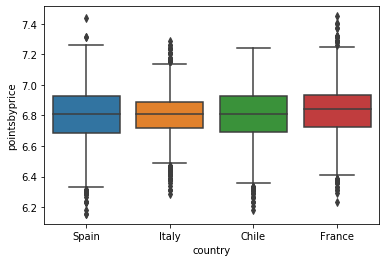

In [42]:
sns.boxplot( y=NewPrice2['pointsbyprice'], x=NewPrice2['country'] );
plt.show()

Вывод - Франция выделяется, качество вина оказалось выше, чем в других странах. 

In [54]:
NP_crosstab = pd.crosstab(NewPrice2['points'], 
                            NewPrice2['country'],  
                               margins = False) 
print(NP_crosstab) 

country  Chile  France  Italy  Spain
points                              
80          29       6      4     34
81          44       8      6     42
82          99      27     23    116
83         174      87     61    199
84         288     362    182    263
85         379     601    410    321
86         509     685    765    435
87         506     748   1036    448
88         301     656    605    369
89         151     430    291    197
90          76     361    154    110
91          29     155     42     32
92           6      64     26      7
93           0      12      4      2
94           0       4      2      1
95           0       1      0      0


In [55]:
sp.stats.chi2_contingency(NP_crosstab)

(1187.791516496062,
 2.2285208956358562e-219,
 45,
 array([[1.45662688e+01, 2.36512129e+01, 2.03005776e+01, 1.44819407e+01],
        [1.99537928e+01, 3.23989218e+01, 2.78090104e+01, 1.98382749e+01],
        [5.28775510e+01, 8.58571429e+01, 7.36938776e+01, 5.25714286e+01],
        [1.03959261e+02, 1.68798383e+02, 1.44884944e+02, 1.03357412e+02],
        [2.18494032e+02, 3.54768194e+02, 3.04508664e+02, 2.17229111e+02],
        [3.41409395e+02, 5.54345553e+02, 4.75812168e+02, 3.39432884e+02],
        [4.77693801e+02, 7.75630189e+02, 6.65747709e+02, 4.74928302e+02],
        [5.46334848e+02, 8.87082480e+02, 7.61410705e+02, 5.43171968e+02],
        [3.85307740e+02, 6.25623181e+02, 5.36991991e+02, 3.83077089e+02],
        [2.13306045e+02, 3.46344474e+02, 2.97278321e+02, 2.12071159e+02],
        [1.39876088e+02, 2.27116442e+02, 1.94941163e+02, 1.39066307e+02],
        [5.14807855e+01, 8.35892183e+01, 7.17472468e+01, 5.11827493e+01],
        [2.05524066e+01, 3.33708895e+01, 2.86432807e+01, 2.04

По оценкам различия есть